In [1]:
import numpy as np
import pickle

np.random.seed(13)
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, Reshape, Activation, Bidirectional,\
     SimpleRNN, GRU, LSTM, Convolution1D, MaxPooling1D, Merge, Dropout, Convolution2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.np_utils import to_categorical
from IPython.display import SVG

from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.utils.vis_utils import model_to_dot, plot_model
from os import sys

from sklearn.cross_validation import train_test_split

import keras

import matplotlib.pyplot as plt
%matplotlib inline

/home/chrisgiler/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/chrisgiler/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
with open('train_data.pkl', 'rb') as pkl:
    song_areas = pickle.load(pkl)

In [5]:
song_areas

{'Gentrain.mid': {'Bass': 'Fretless Bass',
  'Bass_Grid': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'Bass_Grid_Shift': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'Chords': 'Lute',
  'Chords_Grid': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'Chords_Grid_Shift': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0.,

In [14]:
all_melodies = np.zeros([128,1])
all_chords = np.zeros([128,1])
for song, values in song_areas.items():
    all_melodies = np.append(all_melodies, values['Melody_Grid_Shift'], axis=1)
    all_chords = np.append(all_chords, values['Chords_Grid_Shift'], axis=1)
all_melodies = all_melodies.T
all_chords = all_chords.T

In [15]:
print(all_melodies.shape)
print(all_chords.shape)

(8449, 128)
(8449, 128)


In [16]:
# Encode as 1's and 0's for Note_On / Note_Off
thd = 25
all_melodies[all_melodies < thd] = 0
all_melodies[all_melodies >= thd] = 1
all_chords[all_chords < thd] = 0
all_chords[all_chords >= thd] = 1

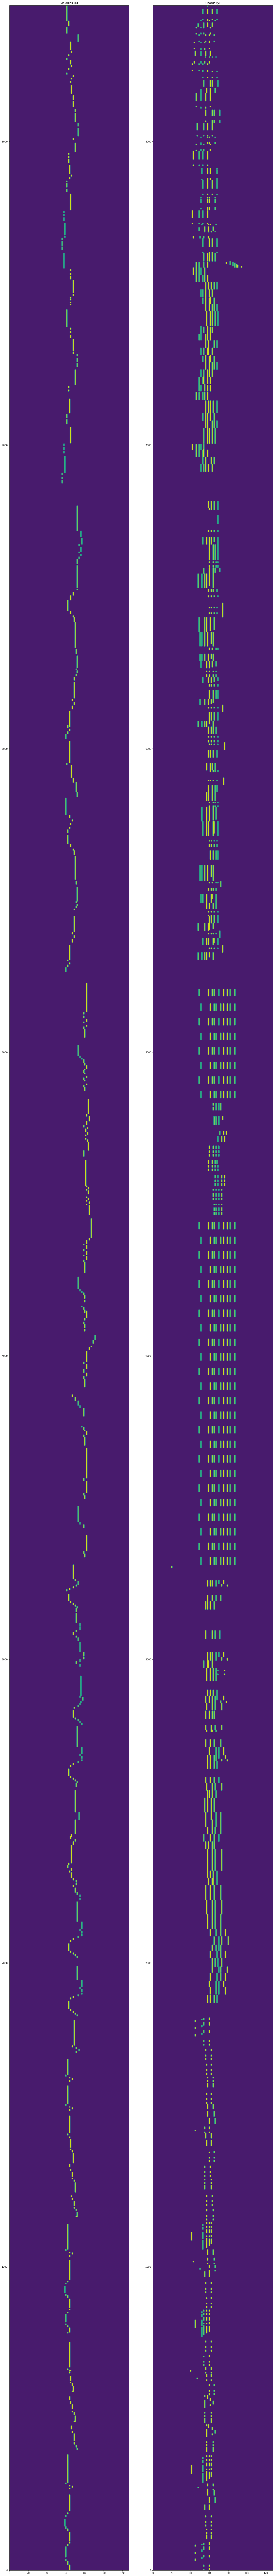

In [17]:
fig, ax = plt.subplots(1,2, figsize=(20,200))
plt.sca(ax[0])
plt.contourf(all_melodies)
plt.title('Melodies (X)');
plt.sca(ax[1])
plt.contourf(all_chords)
plt.title('Chords (y)');

In [35]:
train_len = 48
step = 1
X_sequences = []
y_notes = []
for i in range(0, all_melodies.shape[0] - train_len - step, step):
    X_sequences.append(all_melodies[i:i+train_len])
    y_notes.append(all_chords[i+train_len])
X_sequences = np.array(X_sequences)
y_notes = np.array(y_notes)

In [36]:
X_sequences.shape

(8400, 48, 128)

In [12]:
model_long = Sequential()
model_long.add(LSTM(128, input_shape=(train_len, 128)))
model_long.add(Dense(128))
model_long.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model_long.compile(loss='categorical_crossentropy', optimizer=optimizer)
model_long.fit(X_sequences, y_notes, epochs=20)

Epoch 1/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.3961
Epoch 2/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.3202
Epoch 3/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.2941
Epoch 4/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.3130
Epoch 5/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.3262
Epoch 6/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.3140
Epoch 7/20
8400/8400 [==============================] - 21s 3ms/step - loss: 10.3305
Epoch 8/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.3344
Epoch 9/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.3497
Epoch 10/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.3266
Epoch 11/20
8400/8400 [==============================] - 22s 3ms/step - loss: 10.3262
Epoch 12/20
8400/8400 [==============================] - 22s 3m

In [13]:
model_long.save('long_LSTM_16Mar17')

In [37]:
model_long = load_model('long_LSTM_16Mar17')

In [38]:
X_test = []
y_test = []
for i in range(0, song_areas['automnminnewyork.mid']['Melody_Grid'].shape[1] - train_len - step, step):
    X_test.append(song_areas['automnminnewyork.mid']['Melody_Grid'].T[i:i+train_len])
    y_test.append(song_areas['automnminnewyork.mid']['Chords_Grid'].T[i+train_len])
X_test = np.array(X_test)
y_test = np.array(y_test)

y_pred = model_long.predict(X_test)
y_pred[y_pred > 0.07] = 1
y_pred[y_pred < 1] = 0

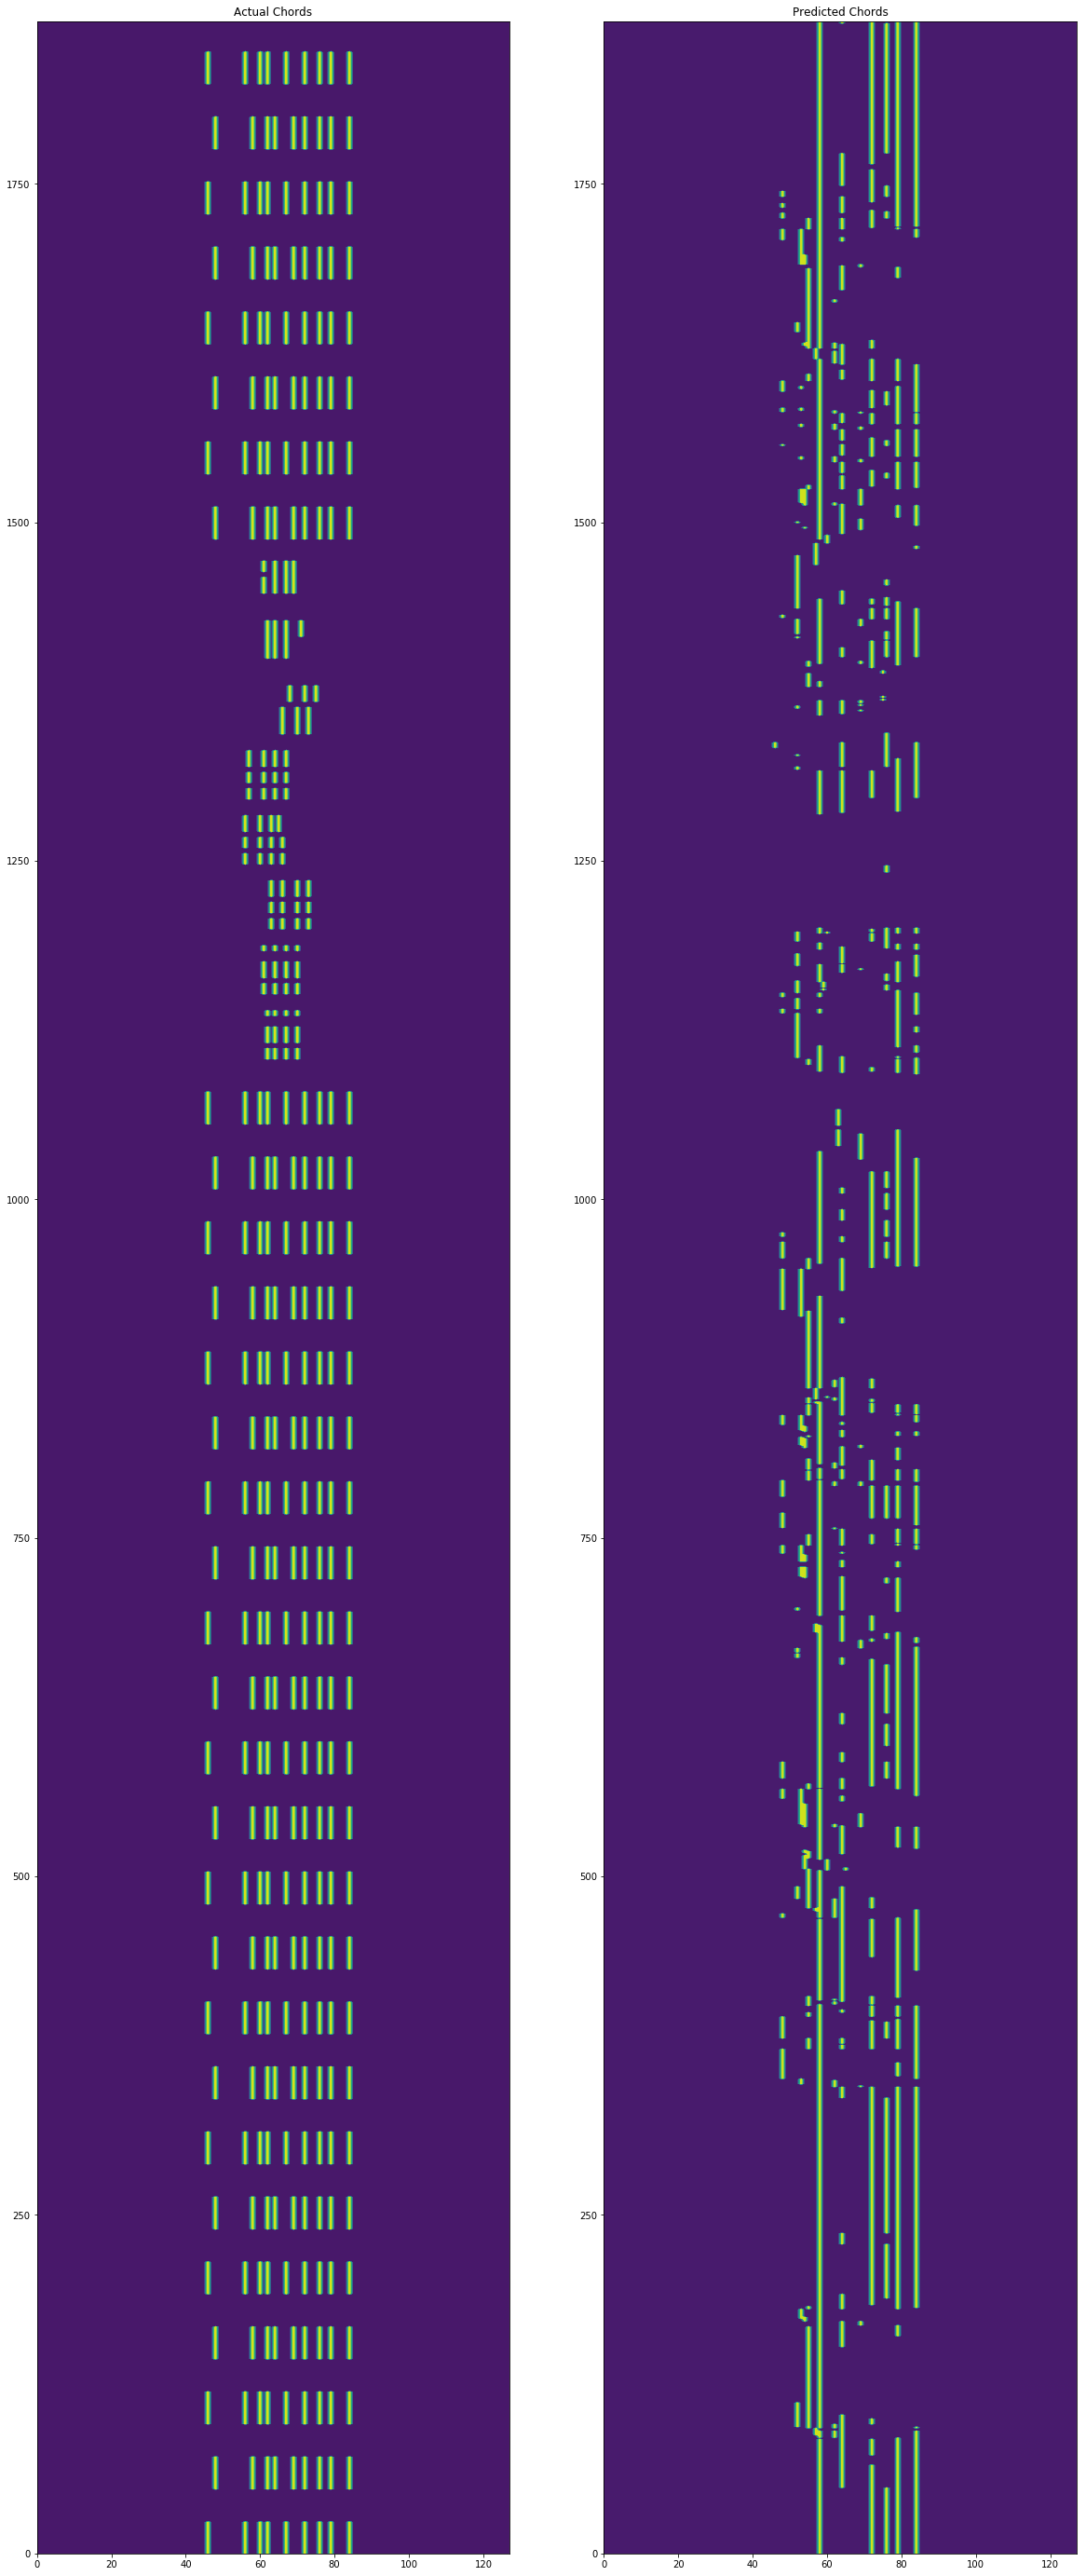

In [39]:
fig, ax = plt.subplots(1,2, figsize=(20,50))
plt.sca(ax[0])
plt.contourf(y_test)
plt.title('Actual Chords');
plt.sca(ax[1])
plt.contourf(y_pred)
plt.title('Predicted Chords');

In [40]:
with open('killerjoe_chord_gen_long_16Mar18.pkl', 'wb') as pkl:
    pickle.dump(y_pred.T, pkl)

In [18]:
train_len = 1
step = 1
X_sequences = []
y_notes = []
for i in range(0, all_melodies.shape[0] - train_len - step, step):
    X_sequences.append(all_melodies[i:i+train_len])
    y_notes.append(all_chords[i+train_len])
X_sequences = np.array(X_sequences)
y_notes = np.array(y_notes)

In [29]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_len, 128)))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.8))
# model.add(Dense(1028, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(128, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.fit(X_sequences, y_notes, epochs=40)

Epoch 1/40
8447/8447 [==============================] - 2s 280us/step - loss: 9.0750
Epoch 2/40
8447/8447 [==============================] - 2s 207us/step - loss: 8.5568
Epoch 3/40
8447/8447 [==============================] - 2s 208us/step - loss: 8.5095
Epoch 4/40
8447/8447 [==============================] - 2s 210us/step - loss: 8.4920
Epoch 5/40
8447/8447 [==============================] - 2s 210us/step - loss: 8.4842
Epoch 6/40
8447/8447 [==============================] - 2s 209us/step - loss: 8.4758
Epoch 7/40
8447/8447 [==============================] - 2s 210us/step - loss: 8.4662
Epoch 8/40
8447/8447 [==============================] - 2s 208us/step - loss: 8.4658
Epoch 9/40
8447/8447 [==============================] - 2s 207us/step - loss: 8.4589
Epoch 10/40
8447/8447 [==============================] - 2s 208us/step - loss: 8.4498
Epoch 11/40
8447/8447 [==============================] - 2s 208us/step - loss: 8.4578
Epoch 12/40
8447/8447 [==============================] - 2s 208

In [23]:
model.save('LSTM_multi_17Mar18')

In [24]:
model = load_model('LSTM_multi_17Mar18')

In [53]:
X_test = []
y_test = []
for i in range(0, song_areas['automnminnewyork.mid']['Melody_Grid_Shift'].shape[1] - train_len - step, step):
    X_test.append(song_areas['automnminnewyork.mid']['Melody_Grid_Shift'].T[i:i+train_len])
    y_test.append(song_areas['automnminnewyork.mid']['Chords_Grid_Shift'].T[i+train_len])
X_test = np.array(X_test)
y_test = np.array(y_test)

y_pred = model.predict(X_test)
y_pred[y_pred > 0.08] = 1
y_pred[y_pred < 1] = 0

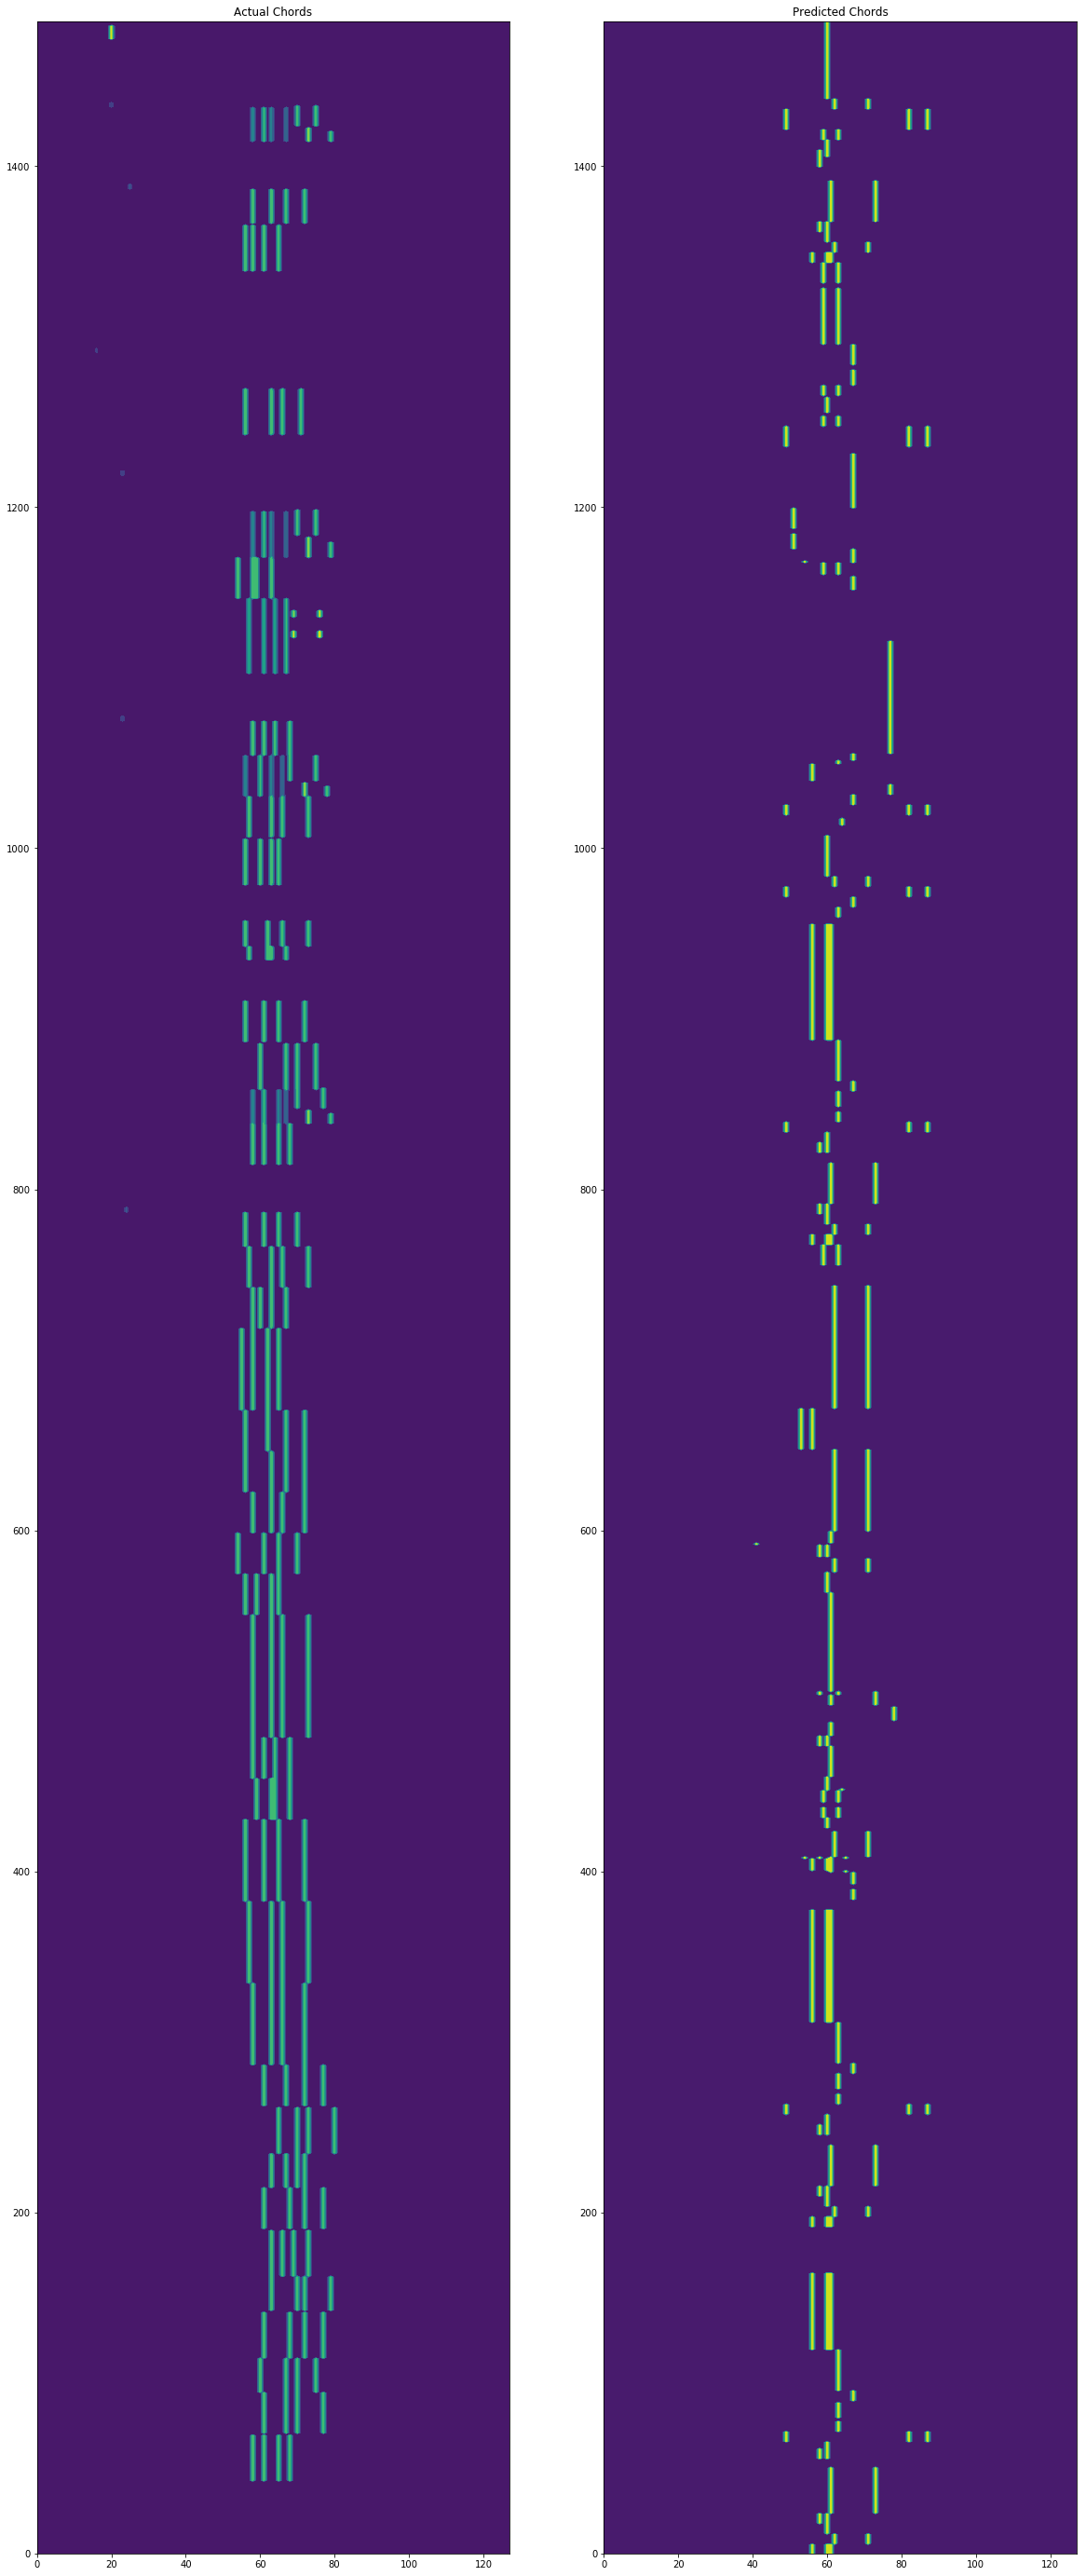

In [54]:
fig, ax = plt.subplots(1,2, figsize=(20,50))
plt.sca(ax[0])
plt.contourf(y_test)
plt.title('Actual Chords');
plt.sca(ax[1])
plt.contourf(y_pred)
plt.title('Predicted Chords');
# plt.sca(ax[2])
# plt.contourf(X_test)

In [55]:
with open('automn_chord_gen_16Mar18.pkl', 'wb') as pkl:
    pickle.dump(y_pred.T, pkl)

In [57]:
notes = []
for r, row in enumerate(y_pred.T):
    counter = 0
    for c, val in enumerate(row):
        if val == 1:
            if counter == 0:
                note = r
                start_tick = c
                counter += 1
        elif val == 0:
            if counter > 0:
                end_tick = c
                notes.append([note, start_tick, end_tick - start_tick])
            counter = 0

[[17, 24, 27],
 [17, 216, 24],
 [17, 498, 6],
 [17, 792, 24],
 [17, 1368, 24],
 [45, 474, 6],
 [45, 1404, 6],
 [46, 489, 8],
 [47, 1400, 4],
 [49, 12, 6],
 [49, 62, 4],
 [49, 204, 6],
 [49, 252, 6],
 [49, 426, 6],
 [49, 449, 7],
 [49, 564, 12],
 [49, 780, 6],
 [49, 828, 6],
 [49, 1256, 9],
 [49, 1356, 6],
 [49, 1410, 6],
 [53, 18, 6],
 [53, 56, 4],
 [53, 210, 6],
 [53, 246, 6],
 [53, 585, 7],
 [53, 786, 6],
 [53, 822, 6],
 [53, 1362, 6],
 [55, 60, 2],
 [55, 66, 6],
 [55, 90, 6],
 [55, 258, 6],
 [55, 282, 6],
 [55, 384, 6],
 [55, 393, 7],
 [55, 504, 2],
 [55, 592, 1],
 [55, 834, 6],
 [55, 858, 6],
 [55, 966, 12],
 [55, 1020, 12],
 [55, 1052, 4],
 [55, 1152, 8],
 [55, 1169, 7],
 [55, 1200, 32],
 [55, 1236, 12],
 [55, 1272, 9],
 [55, 1284, 12],
 [55, 1422, 12],
 [57, 12, 6],
 [57, 62, 4],
 [57, 204, 6],
 [57, 252, 6],
 [57, 426, 6],
 [57, 449, 7],
 [57, 564, 12],
 [57, 780, 6],
 [57, 828, 6],
 [57, 984, 24],
 [57, 1032, 6],
 [57, 1056, 66],
 [57, 1256, 9],
 [57, 1356, 6],
 [57, 1410, 6],


In [123]:
all_chords.shape

(8449, 128)

In [127]:
model2 = Sequential()
model2.add(LSTM(128, input_shape=(1, 128)))
model2.add(Dense(128))
model2.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer)
model2.fit(np.array([all_melodies]), np.array([all_chords]), epochs=10)

ValueError: Error when checking input: expected lstm_19_input to have shape (1, 128) but got array with shape (8449, 128)

In [102]:
y_notes[51]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
y_test[y_test > 0.07] = 1
y_test[y_test < 1] = 0
y_test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [106]:
y_notes[51] * y_test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
melody_grid = song_areas['Gentrain.mid']['Melody_Grid']
train_len = 48
maxlen = train_len
step = 3

note_grids = []
next_notes = []
for i in range(0, melody_grid.shape[1] - train_len, step):
    note_grids.append(np.transpose(melody_grid[:, i: i + train_len]))
    next_notes.append(np.transpose(melody_grid[:, i + train_len]))

In [22]:
print("Number of sequences:", len(note_grids))

Number of sequences: 592


In [23]:
X = np.array(note_grids)
y = np.array(next_notes)

In [24]:
X.shape

(592, 48, 128)

In [51]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_len, 128)))
model.add(Dense(128))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

model.fit(X_sequences, y_notes, batch_size=128, nb_epoch=20)

/home/chrisgiler/anaconda3/lib/python3.5/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
4608/8400 [===============>..............] - ETA: 46s - loss: 41.3295

KeyboardInterrupt: 

In [26]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [42]:
# train the model, output generated text after each iteration
losses=[]
for iteration in range(1, 60):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X, y, batch_size=128, nb_epoch=1)

    start_index = np.random.randint(0, melody_grid.shape[1] - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('----- diversity:', diversity)

        generated = []
        sentence = np.transpose(melody_grid[:, start_index: start_index + maxlen]).tolist()
        generated += sentence
#         print('----- Generating with seed: "')
#         print(sentence)
#         sys.stdout.write(generated)

        for i in range(400):
            x = np.zeros((1, maxlen, l28))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


--------------------------------------------------
Iteration 1
Epoch 1/1


/home/chrisgiler/anaconda3/lib/python3.5/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


592/592 [==============================] - 1s 2ms/step - loss: 8.5228

----- diversity: 0.2

----- diversity: 0.5

----- diversity: 1.0

----- diversity: 1.2

--------------------------------------------------
Iteration 2
Epoch 1/1
592/592 [==============================] - 1s 2ms/step - loss: 7.7388

----- diversity: 0.2

----- diversity: 0.5

----- diversity: 1.0

----- diversity: 1.2

--------------------------------------------------
Iteration 3
Epoch 1/1
592/592 [==============================] - 1s 2ms/step - loss: 9.1990

----- diversity: 0.2

----- diversity: 0.5

----- diversity: 1.0

----- diversity: 1.2

--------------------------------------------------
Iteration 4
Epoch 1/1
592/592 [==============================] - 1s 2ms/step - loss: 8.2002

----- diversity: 0.2

----- diversity: 0.5

----- diversity: 1.0

----- diversity: 1.2

--------------------------------------------------
Iteration 5
Epoch 1/1
592/592 [==============================] - 1s 2ms/step - loss: 6.4371

-

In [66]:
np.array(generated)[9]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 68.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [67]:
model

In [87]:
for i in range(400):
    x = np.zeros((1, maxlen, 128))
    for t, char in enumerate(sentence):
    #     x[0, t, char_indices[char]] = 1.
    #     print(char)
    preds = model.predict(x, verbose=0)[0]
    preds = preds.astype(int)
    sentence.append(preds.tolist())
    generated.append(preds)
    new_sentence = sentence[1:]
    #     next_char = indices_char[next_index]
    #     generated += next_char
    #     sentence = sentence[1:] + next_char

In [108]:
sentence.append(preds.tolist())
new_sentence = sentence[1:]

In [109]:
len(new_sentence)

48

In [93]:
len(generated)

48

In [ ]:
next_index = sample(preds, diversity)
next_char = indices_char[next_index]

generated += next_char
sentence = sentence[1:] + next_char